# Machine Learning


## Multiple Linear Regression

In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [2]:
# Setting to display maximum rows and columns
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
# Loading Dataset
df = sns.load_dataset("taxis")
# Display first few rows
print(df.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total   color      payment            pickup_zone  \
0    0.0  12.95  yellow  credit card        Lenox Hill West   
1    0.0   9.30  yellow         cash  Upper West Side South   
2    0.0  14.16  yellow  credit card          Alphabet City   
3    0.0  36.95  yellow  credit card              Hudson Sq   
4    0.0  13.40  yellow  credit card           Midtown East   

            dropoff_zone pickup_borough dropoff_borough  
0    UN/Turtle Bay South      Manhattan       Manhattan  
1  Upper West Side South      

In [3]:
# Let's check the name of columns
df.columns

Index(['pickup', 'dropoff', 'passengers', 'distance', 'fare', 'tip', 'tolls',
       'total', 'color', 'payment', 'pickup_zone', 'dropoff_zone',
       'pickup_borough', 'dropoff_borough'],
      dtype='object')

In [4]:
# Let's check the shape of the dataset.
print(df.shape)
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this Dataset.")

(6433, 14)
There are 6433 rows and 14 columns in this Dataset.


In [5]:
# Let's check for missing values
print(df.isnull().sum())

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64


In [6]:
# Let's check the missing values percentage
print(df.isnull().sum() / len(df) * 100)


pickup             0.000000
dropoff            0.000000
passengers         0.000000
distance           0.000000
fare               0.000000
tip                0.000000
tolls              0.000000
total              0.000000
color              0.000000
payment            0.683973
pickup_zone        0.404166
dropoff_zone       0.699518
pickup_borough     0.404166
dropoff_borough    0.699518
dtype: float64


Text(0.5, 1.0, 'Heatmap for missing values')

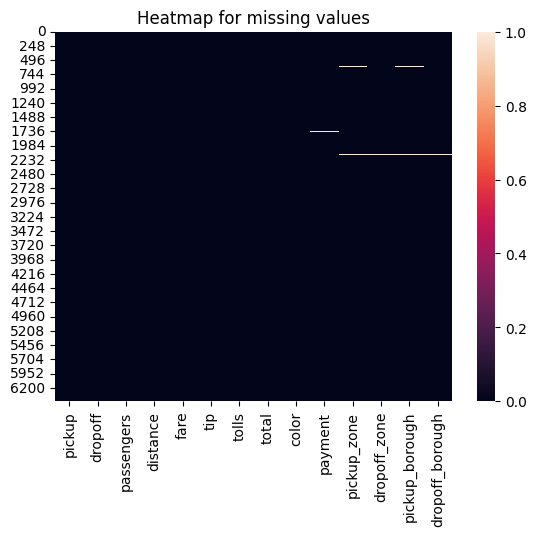

In [7]:
# Making a Heatmap for checking missing values in our dataset.
sns.heatmap(df.isnull())
plt.title("Heatmap for missing values")


In [8]:
print(df[["payment","pickup_zone","dropoff_zone","pickup_borough","dropoff_borough"]].head())

       payment            pickup_zone           dropoff_zone pickup_borough  \
0  credit card        Lenox Hill West    UN/Turtle Bay South      Manhattan   
1         cash  Upper West Side South  Upper West Side South      Manhattan   
2  credit card          Alphabet City           West Village      Manhattan   
3  credit card              Hudson Sq         Yorkville West      Manhattan   
4  credit card           Midtown East         Yorkville West      Manhattan   

  dropoff_borough  
0       Manhattan  
1       Manhattan  
2       Manhattan  
3       Manhattan  
4       Manhattan  


In [9]:
# Fill missing values using the mode for each column
for column in df.columns:
    if df[column].isnull().any():  # Check if there are missing values
        mode_value = df[column].mode()[0]  # Get the mode
        df[column].fillna(mode_value, inplace=True)  # Fill missing values

# Check if there are any missing values left
print(df.isnull().sum())

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64


Text(0.5, 1.0, 'Heatmap for missing values')

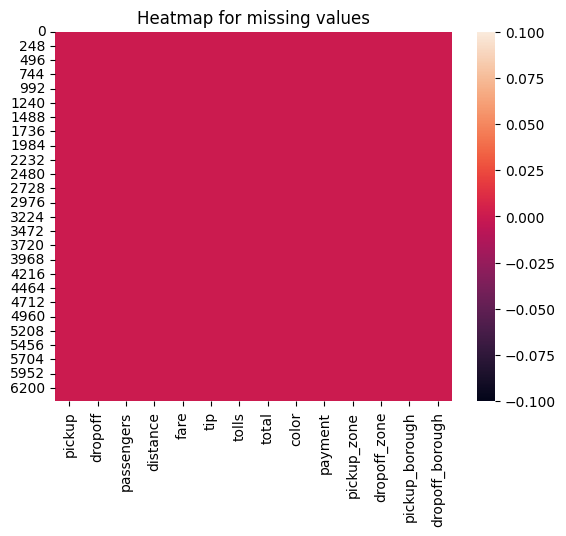

In [10]:
# Heatmap after handle missing values.
sns.heatmap(df.isnull())
plt.title("Heatmap for missing values")


In [11]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to all columns except 'fare'
for column in df.columns:
    if column != 'fare' and df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# Display the transformed DataFrame
print(df.head())

               pickup             dropoff  passengers  distance  fare   tip  \
0 2019-03-23 20:21:09 2019-03-23 20:27:24           1      1.60   7.0  2.15   
1 2019-03-04 16:11:55 2019-03-04 16:19:00           1      0.79   5.0  0.00   
2 2019-03-27 17:53:01 2019-03-27 18:00:25           1      1.37   7.5  2.36   
3 2019-03-10 01:23:59 2019-03-10 01:49:51           1      7.70  27.0  6.15   
4 2019-03-30 13:27:42 2019-03-30 13:37:14           3      2.16   9.0  1.10   

   tolls  total  color  payment  pickup_zone  dropoff_zone  pickup_borough  \
0    0.0  12.95      1        1           99           176               2   
1    0.0   9.30      1        0          174           182               2   
2    0.0  14.16      1        1            1           190               2   
3    0.0  36.95      1        1           86           202               2   
4    0.0  13.40      1        1          116           202               2   

   dropoff_borough  
0                2  
1             

In [13]:
# Drop all datetime columns from features
X = df.drop(['fare'], axis=1)
datetime_cols = X.select_dtypes(include=['datetime', 'datetime64[ns]']).columns
X = X.drop(datetime_cols, axis=1)
y = df['fare']

# Now split and train as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.6975140375551065
Mean Absolute Error: 0.5298373874785463
R-squared: 0.9944981898368453


🔢 Sample of Actual vs Predicted Values:

      Actual  Predicted
4092     9.0   9.588967
6282     8.5   8.488427
3237    14.0  14.370487
1891    10.5  10.898946
5010    11.5  11.872350
2168    25.5  24.854879
5154     5.5   5.254193
5202    17.5  17.074590
247     13.0  13.670012
198      3.0   3.996473
2977     5.5   5.531897
5170     5.0   4.642281
239      7.5   7.276489
764      4.5   5.406590
2087     5.0   4.794189


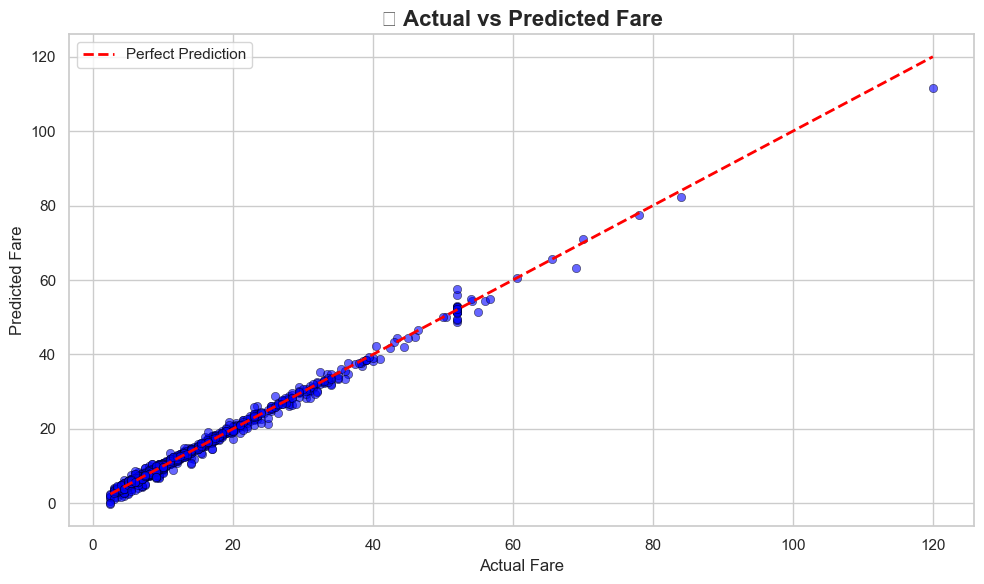

In [17]:

# Assuming y_test and y_pred already exist
visualization_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# ✅ Show first few rows numerically (side by side)
print("🔢 Sample of Actual vs Predicted Values:\n")
print(visualization_df.head(15))  # Show first 10 comparisons

# ✅ Scatter plot for visual comparison
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Actual', y='Predicted', data=visualization_df, alpha=0.6, color='blue', edgecolor='black')
plt.plot(
    [visualization_df['Actual'].min(), visualization_df['Actual'].max()],
    [visualization_df['Actual'].min(), visualization_df['Actual'].max()],
    color='red', linestyle='--', linewidth=2, label='Perfect Prediction'
)
plt.title('🎯 Actual vs Predicted Fare', fontsize=16, fontweight='bold')
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.legend()
plt.tight_layout()
plt.show()


In [15]:
# # Save the model
# import pickle
# # Save the model 
# model_filename = 'Models/Ride_Fare_prediction_model.pkl'
# with open(model_filename, 'wb') as file:
#     pickle.dump(model, file)